# Kaggle - Titanic: Machine Learning from Disaster


In [82]:
# 資料處理
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# 模型
from keras.models import Sequential  
from keras.layers import Dense, Activation,Dropout  
from keras.optimizers import RMSprop  
from keras.utils import np_utils  

#繪圖
import matplotlib.pyplot as plt

## 整理資料

In [83]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [58]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId = 乘客ID
- Pclass = 艙等
- Name = 姓名
- Sex = 性別
- Age = 年齡
- SibSp = 手足或配偶也在船上
- Parch = 雙親或子女也在船上
- Ticket = 票號
- Fare = 費用
- Cabin = 艙位號
- Embarked = 登陸港口

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


資料處理

In [84]:
def sex(row):
    if row['Sex'] == 'male':
        return 1
    else:
        return 0
    
train_data['Sex'] = train_data.apply(sex, axis = 1)
test_data['Sex'] = test_data.apply(sex, axis = 1)


train_data.Age.fillna(np.nanmedian(train_data['Age']), inplace = True)
test_data.Age.fillna(np.nanmedian(train_data['Age']), inplace = True)

mean = np.mean(train_data['Age'])
std = np.std(train_data['Age'])


train_data['Age'] = (train_data['Age'] - mean )/(std)
test_data['Age'] = (test_data['Age'] - mean)/(std)

採用以下變數

In [85]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Embarked'] 
train_data_y = train_data['Survived']
train_data_x  =  train_data[features]
train_data_x  = pd.get_dummies(train_data_x)
test_data =  pd.get_dummies(test_data[features])

## 建模

In [87]:
model=Sequential()  

model.add(Dense(10, input_shape=(8, ), activation='relu'))  

model.add(Dense(20, activation='relu'))  

model.add(Dense(20, activation='relu'))  
  
model.add(Dense(1, activation='sigmoid'))  

rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)  
model.compile(optimizer=rmsprop,loss='binary_crossentropy',  
              metrics=['accuracy'])  

In [88]:
train_model = model.fit(train_data_x, train_data_y, validation_split=0.1, epochs = 100, batch_size = 30)

Train on 801 samples, validate on 90 samples
Epoch 1/100
801/801 [==============================] - 0s 375us/step - loss: 0.6263 - acc: 0.6317 - val_loss: 0.5693 - val_acc: 0.6444
Epoch 2/100
801/801 [==============================] - 0s 41us/step - loss: 0.5890 - acc: 0.6617 - val_loss: 0.5379 - val_acc: 0.7000
Epoch 3/100
801/801 [==============================] - 0s 31us/step - loss: 0.5662 - acc: 0.6941 - val_loss: 0.5170 - val_acc: 0.7444
Epoch 4/100
801/801 [==============================] - 0s 32us/step - loss: 0.5492 - acc: 0.7154 - val_loss: 0.5000 - val_acc: 0.7889
Epoch 5/100
801/801 [==============================] - 0s 34us/step - loss: 0.5333 - acc: 0.7528 - val_loss: 0.4834 - val_acc: 0.7778
Epoch 6/100
801/801 [==============================] - 0s 31us/step - loss: 0.5173 - acc: 0.7678 - val_loss: 0.4700 - val_acc: 0.8222
Epoch 7/100
801/801 [==============================] - 0s 30us/step - loss: 0.5030 - acc: 0.7865 - val_loss: 0.4711 - val_acc: 0.8222
Epoch 8/100
801/

801/801 [==============================] - 0s 32us/step - loss: 0.3972 - acc: 0.8365 - val_loss: 0.3881 - val_acc: 0.8556
Epoch 62/100
801/801 [==============================] - 0s 31us/step - loss: 0.3968 - acc: 0.8414 - val_loss: 0.3817 - val_acc: 0.8444
Epoch 63/100
801/801 [==============================] - 0s 30us/step - loss: 0.3959 - acc: 0.8390 - val_loss: 0.3824 - val_acc: 0.8556
Epoch 64/100
801/801 [==============================] - 0s 30us/step - loss: 0.3970 - acc: 0.8302 - val_loss: 0.3867 - val_acc: 0.8556
Epoch 65/100
801/801 [==============================] - 0s 32us/step - loss: 0.3957 - acc: 0.8290 - val_loss: 0.3821 - val_acc: 0.8556
Epoch 66/100
801/801 [==============================] - 0s 29us/step - loss: 0.3951 - acc: 0.8402 - val_loss: 0.3829 - val_acc: 0.8556
Epoch 67/100
801/801 [==============================] - 0s 31us/step - loss: 0.3961 - acc: 0.8352 - val_loss: 0.3840 - val_acc: 0.8556
Epoch 68/100
801/801 [==============================] - 0s 30us/step

In [89]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

結果

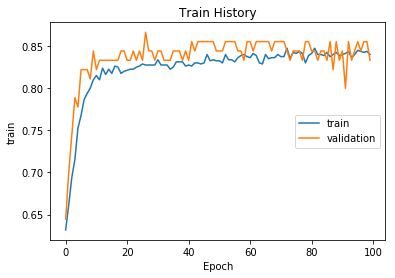

In [90]:
show_train_history(train_model, 'acc', 'val_acc')

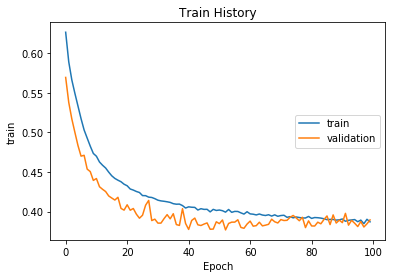

In [91]:
show_train_history(train_model, 'loss', 'val_loss')

In [92]:
test_data['predict'] = model.predict(test_data)

In [93]:
test_data['PassengerId'] =pd.read_csv("test.csv").PassengerId

In [97]:
test_data['Survived']  = test_data['predict'].apply(lambda x:1 if x >=0.5 else 0)

In [102]:
sub = test_data[['PassengerId', 'Survived']]
sub.to_csv("gender_submission0607.csv" , encoding = "utf-8")

## 提交後效果

![](https://i.imgur.com/Cp3YBx1.png)